In [6]:
import math
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (13,8)
# plt.style.use('xkcd')
plt.xkcd()
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 16

In [8]:
doubling_time = 6 # In days
total_population = 50e6
days = np.linspace(0, 100, 101)
cum_cases = 2**(days/doubling_time)
cum_cases = np.round(cum_cases).astype('int')
new_cases = np.diff(cum_cases)
healthy = total_population - cum_cases

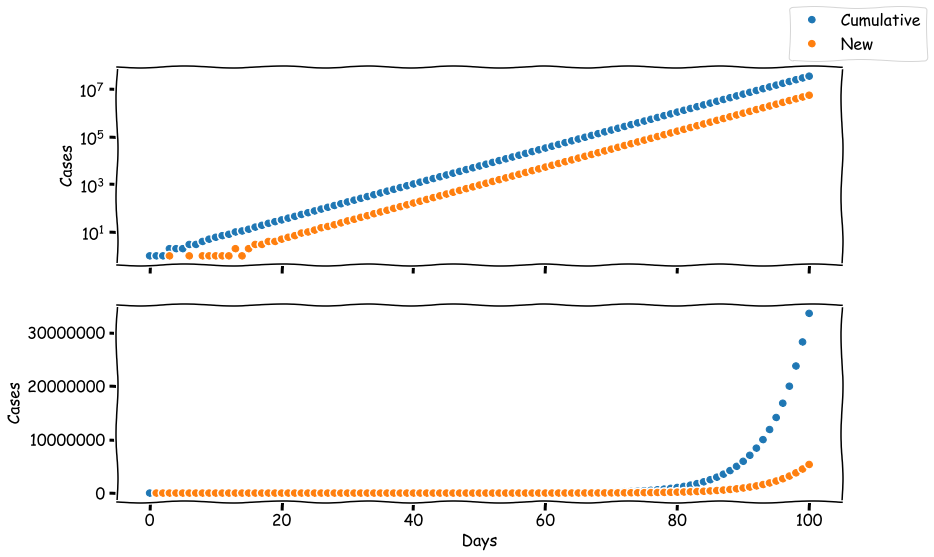

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(days, cum_cases, 'o')
ax[0].plot(days[1:], new_cases, 'o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Cases')
ax[1].plot(days, cum_cases, 'o')
ax[1].plot(days[1:], new_cases, 'o')
ax[1].set_ylabel('Cases')
fig.legend(['Cumulative', 'New'])
ax[1].set_xlabel('Days')
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))

Text(0.5, 0, 'Days')

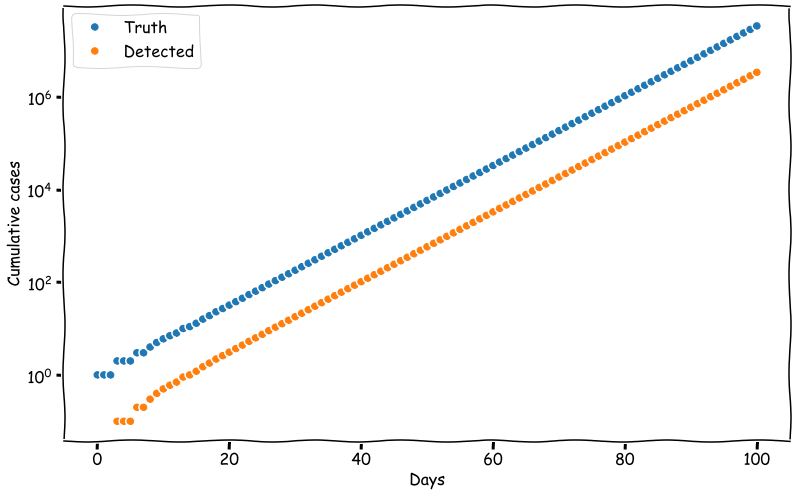

In [10]:
sampling_efficiency = .1
detected_cases_day = .1*new_cases
total_detected_cases = np.cumsum(detected_cases_day)
fig, ax = plt.subplots(1, 1)
ax.plot(days, cum_cases, 'o')
ax.plot(days[1:], total_detected_cases, 'o')
ax.set_yscale('log')
ax.legend(['Truth', 'Detected'])
ax.set_ylabel('Cumulative cases')
ax.set_xlabel('Days')

Text(0.5, 0, 'Days')

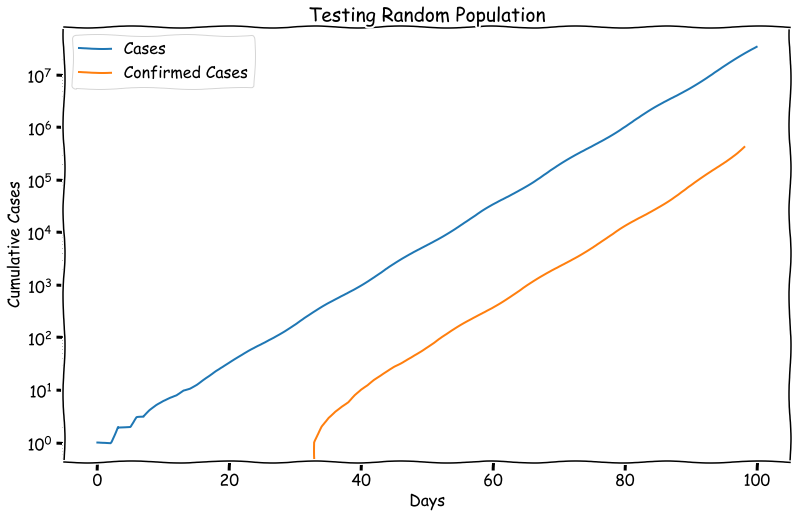

In [11]:
population_testing = 500000
prob_detection = new_cases[:-1]/healthy[1:-1]*population_testing
prob_detection = np.round(prob_detection)
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.title('Testing Random Population')
plt.legend(['Cases', 'Confirmed Cases'])
plt.ylabel('Cumulative Cases')
plt.xlabel('Days')

Text(0.5, 0, 'Days')

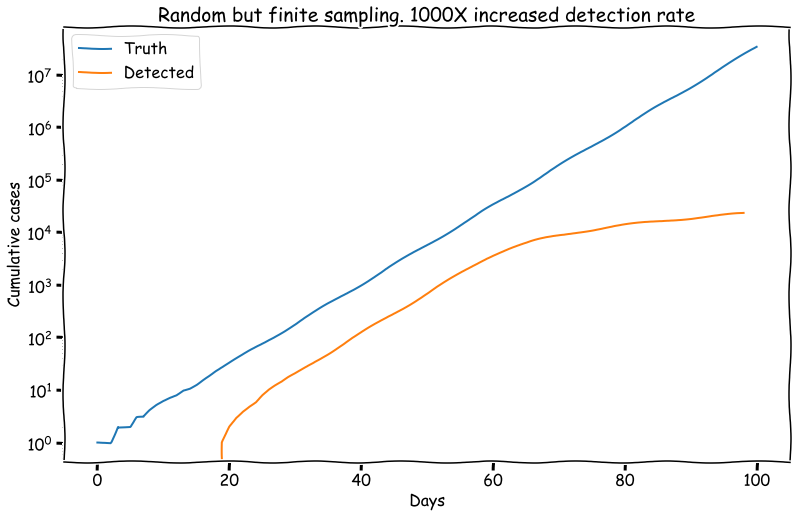

In [12]:
testing_capacity = 500
prob_detection = 10000*new_cases[:-1]/healthy[1:-1]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Random but finite sampling. 1000X increased detection rate')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Text(0.5, 0, 'Days')

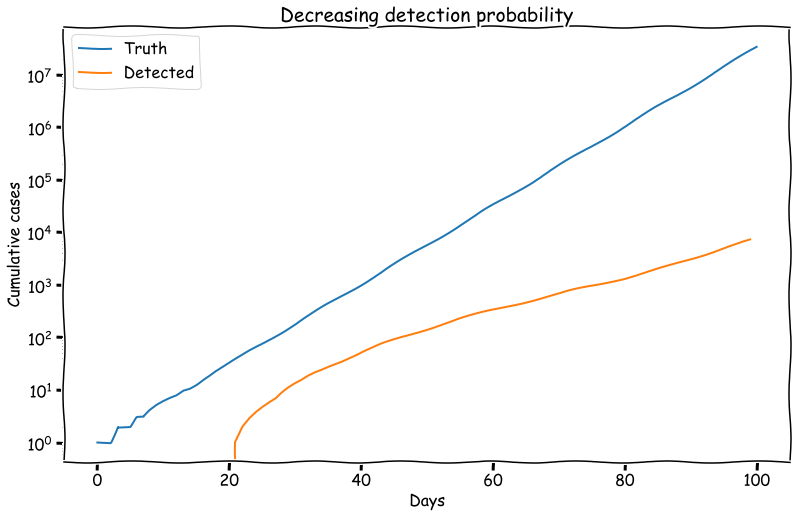

In [14]:
testing_capacity = 500
diff = np.ones(len(new_cases))
diff[new_cases>0] = new_cases[new_cases>0]
increase_rate = 9990*sigmoid(-.12*days[1:]+4.1)+10
prob_detection = increase_rate*new_cases/healthy[1:]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Decreasing detection probability')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

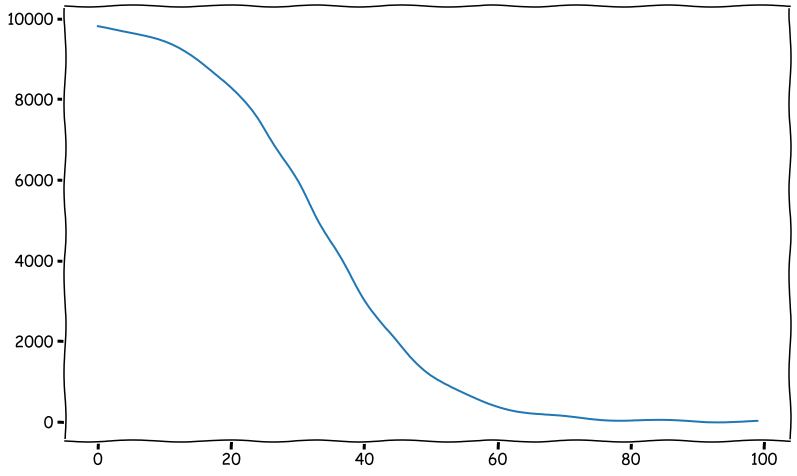

In [15]:
plt.plot(increase_rate)

Text(0.5, 1.0, 'Increasing testing capacity every 10 days')

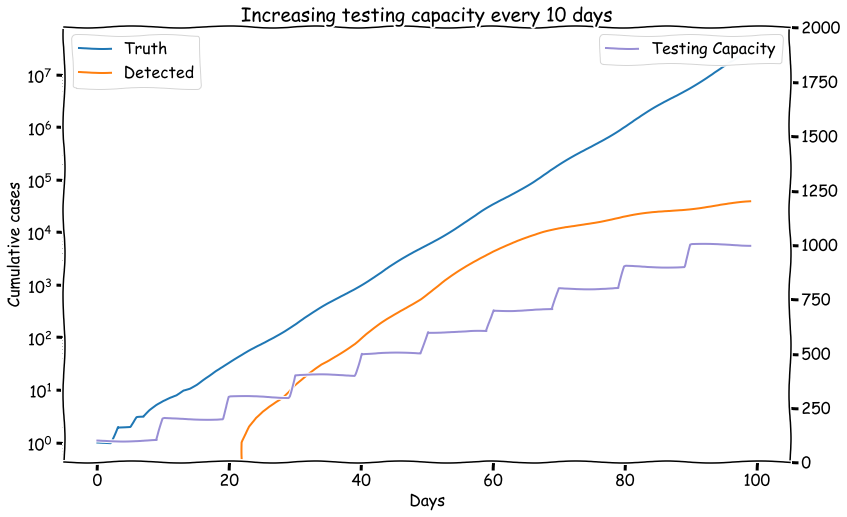

In [16]:
increase_step = 100
testing_capacity = increase_step * \
    (1+np.heaviside(days-10, 1) + np.heaviside(days-20, 1) + np.heaviside(days-30, 1) + np.heaviside(days-40, 1)
      + np.heaviside(days-50, 1) + np.heaviside(days-60, 1) + np.heaviside(days-70, 1) + np.heaviside(days-80, 1)
      + np.heaviside(days-90, 1)
    )
    
testing_capacity = testing_capacity[:-1]
prob_detection = 10000*new_cases/healthy[1:]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity[prob_detection>testing_capacity]
cum_detection = np.cumsum(prob_detection)
fix, ax = plt.subplots()
ax.plot(cum_cases)
ax.plot(cum_detection)
ax.set_ylabel('Cumulative cases')
ax.set_xlabel('Days')
ax.set_yscale('log')
ax.legend(['Truth', 'Detected'])

ax2 = plt.twinx()
ax2.plot(testing_capacity, color='#988ED5')
ax2.set_ylim(0,2000)
ax2.legend(['Testing Capacity'])
plt.title('Increasing testing capacity every 10 days')


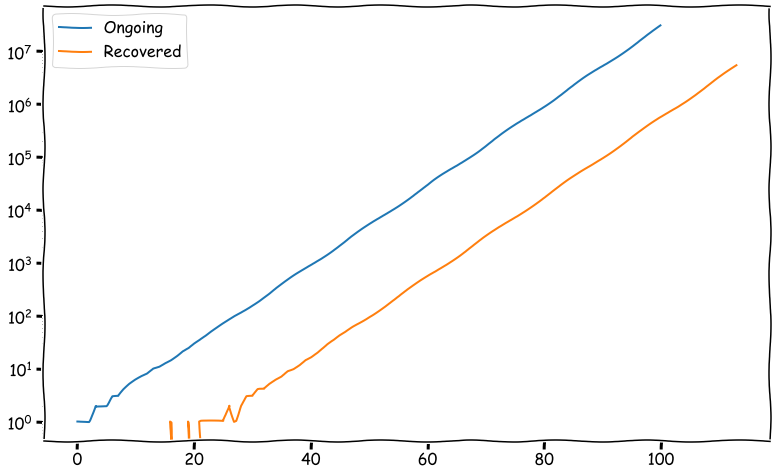

In [17]:
days_to_recover = 14
recovered = np.zeros(len(new_cases)+days_to_recover)
recovered[days_to_recover:] = new_cases
cum_recovered = np.cumsum(recovered[:-days_to_recover+1])
ongoing = cum_cases - cum_recovered
plt.plot(ongoing)
plt.plot(recovered)
plt.yscale('log')
plt.legend(['Ongoing', 'Recovered'])

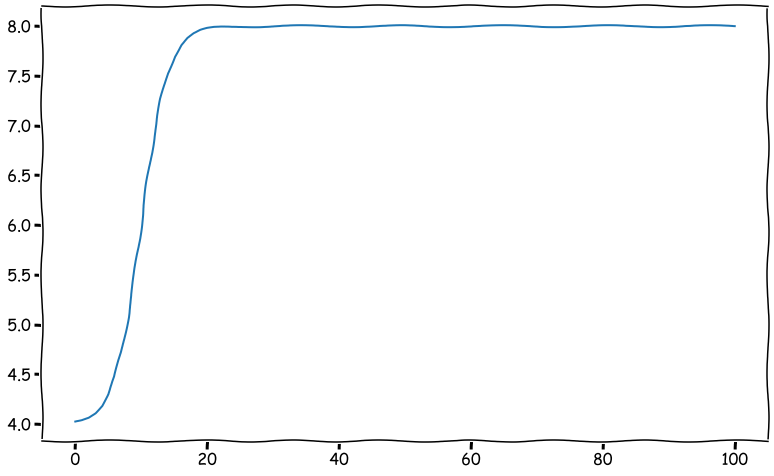

In [18]:
variable_doubling_time = 1*sigmoid(.5*days-5)*doubling_time+doubling_time
plt.plot(variable_doubling_time)

In [19]:
variable_cum_cases = np.zeros(len(days))
variable_cum_cases[0] = 1
for i in range(1, len(variable_cum_cases)):
    variable_cum_cases[i] = variable_cum_cases[i-1]*2**(1/variable_doubling_time[i])
variable_cum_cases = np.round(variable_cum_cases).astype('int')
variable_new_cases = np.diff(variable_cum_cases)
healthy = total_population - variable_cum_cases

Text(0.5, 0, 'Days')

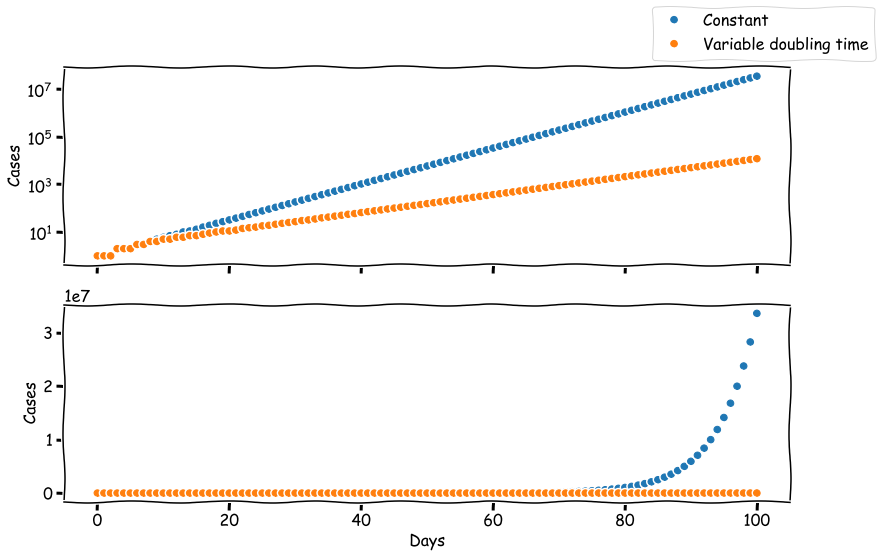

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(days, cum_cases, 'o')
ax[0].plot(days, variable_cum_cases, 'o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Cases')
ax[1].plot(days, cum_cases, 'o')
ax[1].plot(days, variable_cum_cases, 'o')
ax[1].set_ylabel('Cases')
fig.legend(['Constant', 'Variable doubling time'])
ax[1].set_xlabel('Days')

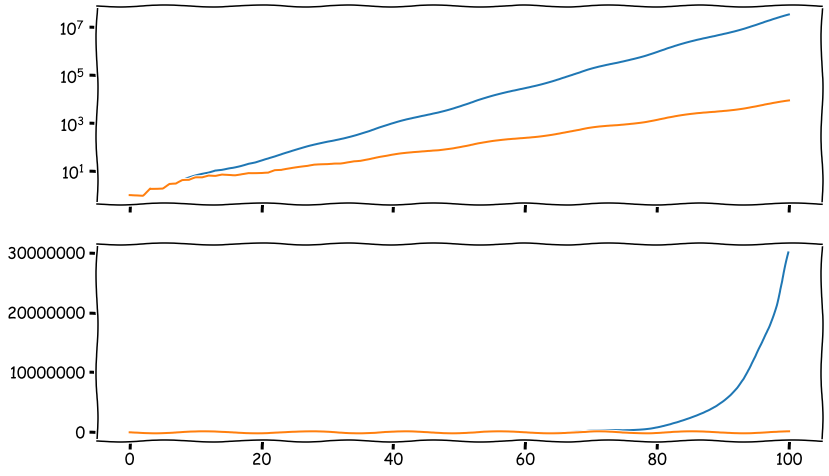

In [21]:
variable_recovered = np.zeros(len(variable_new_cases)+days_to_recover)
variable_recovered[days_to_recover:] = variable_new_cases
variable_cum_recovered = np.cumsum(variable_recovered[:-days_to_recover+1])
variable_ongoing = variable_cum_cases - variable_cum_recovered

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(ongoing)
ax[0].plot(variable_ongoing)
ax[0].set_yscale('log')

ax[1].plot(ongoing)
ax[1].plot(variable_ongoing)
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))

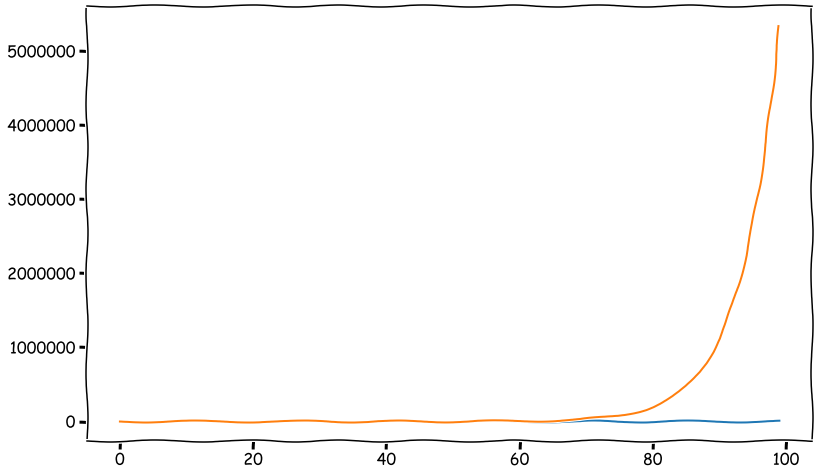

In [22]:
plt.plot(variable_new_cases)
plt.plot(new_cases)

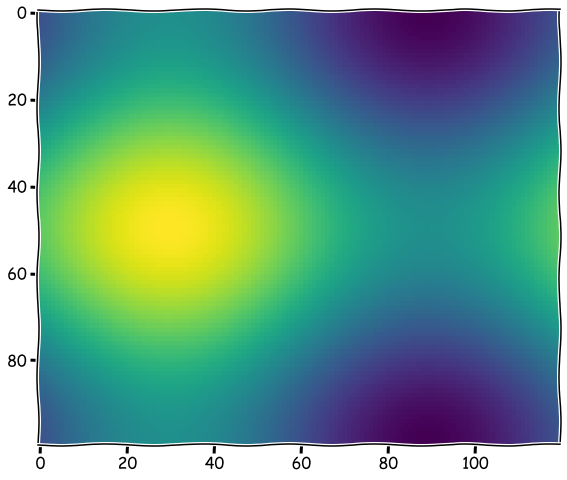

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.mp4')

plt.show()